## Read advertising.csv

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('advertising.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Comparing Proportions (CI - Hypothesis Test)
### Check for significance difference between Male and Female in Daily Time Spent on Site.
### Find the CI for this difference.
### Define and write your null and alternate hypothesis.
### Write your conclusion (Reject/not reject null hypothesis) and explain what does it mean (there is significance difference or not).
### Solve using the calculation steps and confirm using "scipy.stats.ttest_ind()"

In [8]:
df['Male'].value_counts()

0    519
1    481
Name: Male, dtype: int64

In [9]:
df['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [10]:
import seaborn as sns

<AxesSubplot: xlabel='Clicked on Ad', ylabel='count'>

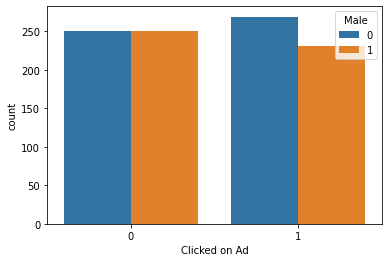

In [11]:
sns.countplot(data = df, x = df['Clicked on Ad'] , hue = df['Male'])

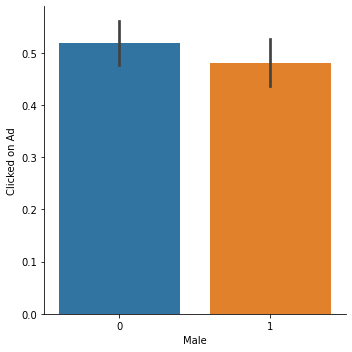

In [75]:
sns.catplot(data = df, x = 'Male', y = 'Clicked on Ad' ,kind = 'bar')

In [39]:
summary = df.groupby('Male').agg(['count','mean','std'])['Clicked on Ad']
summary.head()

C:\Users\marwa\AppData\Local\Temp\ipykernel_4868\2679350930.py:1: FutureWarning: ['Ad Topic Line', 'City', 'Country', 'Timestamp'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary = df.groupby('Male').agg(['count','mean','std'])['Clicked on Ad']


,count,mean,std
Male,,,
0,519,0.518304,0.500147
1,481,0.480249,0.500130


In [59]:
p_males = summary.iloc[1,1]
p_females = summary.iloc[0,1]
n_males = summary.iloc[1,0]
n_females = summary.iloc[0,0]
sigma_m = p_males*(1-p_males)/n_males
sigma_f = p_females*(1-p_females)/n_females
diff = p_females - p_males
print(diff)

0.038054951349748956


In [60]:
import numpy as np
error = np.sqrt(sigma_m + sigma_f)
error

0.03162261108841621

In [61]:
from scipy.stats import norm
z_critical = norm.ppf((0.95/2)+0.5 )
z_critical
# z critical value for 95% confidence interval

1.959963984540054

In [62]:
intervals = [diff-z_critical*error, diff + z_critical*error]
intervals

[-0.023924227480663765, 0.10003413018016168]

In [64]:
# given that null hyp is that difference = 0
z_score = diff/np.sqrt(sigma_m + sigma_f)
print('z_score ',z_score)
p_value = (1-norm.cdf(z_score))*2
print('p_value ', p_value)
# Fail to reject the null hyp as the value is not statisticaly significant

z_score  1.203409523753369
p_value  0.2288178842374482


In [81]:
from scipy.stats import ttest_ind
ttest_ind( a = df[df['Male'] == 1]['Clicked on Ad'], b = df[df['Male'] == 0]['Clicked on Ad'])


Ttest_indResult(statistic=-1.2022004765958763, pvalue=0.22957103161130848)

## Comparing Proportions (CI - Hypothesis Test)
### Check for significance difference between Male and Female in Click on Ad.
### Find the CI for this difference.
### Define and write your null and alternate hypothesis.
### Write your conclusion (Reject/not reject null hypothesis) and explain what does it mean (there is significance difference or not).
### Solve using the calculation steps and confirm using "scipy.stats.ttest_ind()"

In [65]:
summary = df.groupby('Male').agg(['count','mean','std'])['Daily Time Spent on Site']
summary.head()

C:\Users\marwa\AppData\Local\Temp\ipykernel_4868\1668850385.py:1: FutureWarning: ['Ad Topic Line', 'City', 'Country', 'Timestamp'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary = df.groupby('Male').agg(['count','mean','std'])['Daily Time Spent on Site']


,count,mean,std
Male,,,
0,519,65.289287,15.623040
1,481,64.688274,16.109163


In [92]:
mean_m = summary.iloc[1,1]
mean_f = summary.iloc[0,1]
n_males = summary.iloc[1,0]
n_females = summary.iloc[0,0]
sigma_m = np.square(summary.iloc[1,2])
sigma_f = np.square(summary.iloc[0,2])
diff = mean_f - mean_m

<AxesSubplot: xlabel='Male', ylabel='Daily Time Spent on Site'>

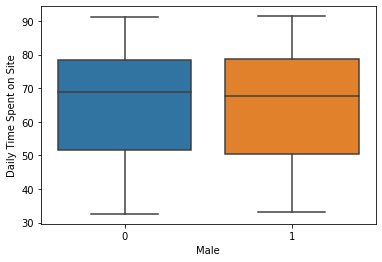

In [69]:
sns.boxplot(data = df, x = df['Male'] ,y = df['Daily Time Spent on Site'])

<AxesSubplot: xlabel='Male', ylabel='Daily Time Spent on Site'>

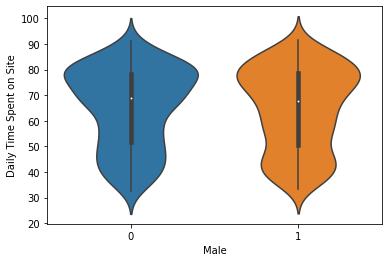

In [70]:
sns.violinplot(data = df, x = df['Male'] ,y = df['Daily Time Spent on Site'])

In [86]:
from scipy.stats import t
t_critical = t.ppf( (0.95/2)+0.5, 998 )
t_critical

1.9623438462163336

In [94]:
error = np.sqrt(sigma_m/n_males + sigma_f/n_females)
error

1.0048878254609044

In [87]:
print('Difference in mean: ', diff)

Difference in mean:  0.6010126622843472


In [95]:
intervals = [diff-t_critical*error, diff+t_critical*error]
print('95% CI:',intervals )

95% CI: [-1.3709227781465716, 2.572948102715266]


In [100]:
t_score = (diff-0)/error
print('t_score ', t_score)
p_value = (t.cdf(t_score, 998)-0.5)*2
print('p_value ',p_value)

t_score  0.5980893061458729
p_value  0.4500839568868187


## Paired t-test
### Check for significant difference in Daily Time Spent on Site in April and May.
### Solve using the calculation steps and confirm using "scipy.stats.ttest_rel()"
### Write your conclusion.

In [102]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [114]:
from datetime import datetime
values = pd.DatetimeIndex(df['Timestamp']).year
values.nunique()
#Sincce its one year so its safe to work on the level of months on the whole dataset

1

In [116]:
df['Month'] = pd.DatetimeIndex(df['Timestamp']).month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  Month                     1000 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [129]:
summary = df[(df['Month'] == 4) | ( df['Month'] == 5)].groupby('Month').agg(['count', 'mean', 'std'])['Daily Time Spent on Site']
summary.head()

C:\Users\marwa\AppData\Local\Temp\ipykernel_4868\2836301909.py:1: FutureWarning: ['Ad Topic Line', 'City', 'Country', 'Timestamp'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary = df[(df['Month'] == 4) | ( df['Month'] == 5)].groupby('Month').agg(['count', 'mean', 'std'])['Daily Time Spent on Site']


,count,mean,std
Month,,,
4,147,65.658844,16.045114
5,147,64.045306,15.988482


In [139]:
april_count = summary.iloc[0,0]
april_mean = summary.iloc[0,1]
april_sigma = np.square(summary.iloc[0,2])

may_count = summary.iloc[1,0]
may_mean = summary.iloc[1,1]
may_sigma = np.square(summary.iloc[1,2])
#setting up the variables

In [140]:
diff = april_mean - may_mean
print(diff)

1.6135374149659896


In [141]:
std_error = np.sqrt( (april_sigma/april_count) + (may_sigma/may_count))
print(std_error)

1.8682401540388411


In [142]:
# The assumption is that there is no difference between spent time in april and may
# Null hyp is that the diff = 0

#checking t_critical at CI 95%
t_critical = t.ppf((0.95/2)+0.5, df = april_count + may_count -2)
print(t_critical)

1.96812140700927


In [143]:
intervals = [ diff - t_critical*std_error , diff + t_critical*std_error]
intervals
# this is the difference between spent time in april and may that I'm confident 95% that I will find in the population

[-2.06338602563215, 5.290460855564129]

In [146]:
t_score = diff/std_error
p_value = ( 1 - t.cdf(t_score, df = april_count+may_count -2) )*2
print('t_score ', t_score)
print('p_value ', p_value)

t_score  0.8636670245405954
p_value  0.38847969263945714


In [138]:
from scipy.stats import ttest_rel
ttest_rel(df[df['Month'] == 4]['Daily Time Spent on Site'], df[df['Month'] == 5]['Daily Time Spent on Site'])

Ttest_relResult(statistic=0.9059345312438, pvalue=0.36646315120526884)

## Chi-square goodness of fit
### Create a new column that contain the month.
### Check if all existing months are equally distributed.
### Confirm using from scipy.stats.chisquare()

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  Month                     1000 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [149]:
df['Month'].value_counts()

2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: Month, dtype: int64

<AxesSubplot: xlabel='Month', ylabel='count'>

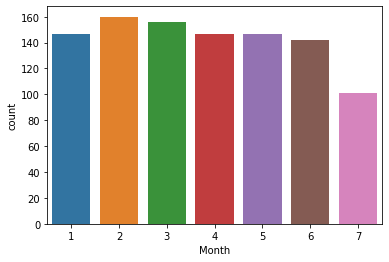

In [150]:
sns.countplot(x = df['Month'])

In [168]:
expected = df.shape[0]/df['Month'].nunique()
expected

142.85714285714286

In [170]:
values = df['Month'].value_counts().to_numpy()
values

array([160, 156, 147, 147, 147, 142, 101], dtype=int64)

In [175]:
chi_squared = [ np.square(values[i]-expected)/expected for i in range(values.shape[0])]
chi_squared = sum(chi_squared)
chi_squared

15.896

In [193]:
chi2.ppf(0.95, df = 6)
#critical chi square value

12.591587243743977

In [183]:
from scipy.stats import chi2
p_value = 1-chi2.cdf(chi_squared , df = 6)
print('chi Square score : ', chi_squared)
print('p_value: ', p_value)
# since chi square is larger than the critical value (p value is less than 0.05) then reject null hyp 

chi Square score :  15.896
p_value:  0.01432319742349919


In [160]:
from scipy.stats import chisquare
chisquare(df['Month'].value_counts())

Power_divergenceResult(statistic=15.896, pvalue=0.01432319742349924)

## Chi-square test of independence
### Check if there is a significant relation between "Clicked on Ad" and "month".
### Use from scipy.stats.chi2_contingency() only.
### Write your conclusion

<AxesSubplot: xlabel='Clicked on Ad', ylabel='count'>

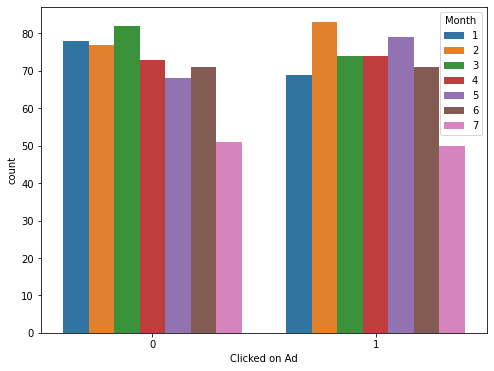

In [189]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = df['Clicked on Ad'], hue = df['Month'])

In [209]:
data = df.groupby(['Month','Clicked on Ad']).size().unstack(fill_value = 0)

In [210]:
data.head(20)

Clicked on Ad,0,1
Month,,
1,78,69
2,77,83
3,82,74
4,73,74
5,68,79
6,71,71
7,51,50


<AxesSubplot: xlabel='Clicked on Ad', ylabel='Month'>

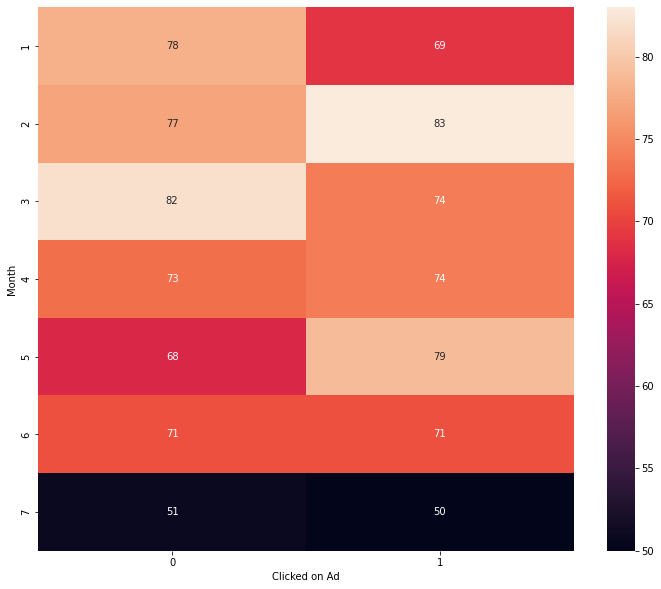

In [219]:
plt.figure(figsize = (12,10))
sns.heatmap(data = data,annot = True)

In [220]:
from scipy.stats import chi2_contingency
chi , p_value , dof, exp = chi2_contingency(data)

In [222]:
print('Chi squared value: ', chi)
print('p value: ', p_value)
print('degree of freedom: ', dof)
print('Expected values: ')
print( exp)

Chi squared value:  2.026109781307801
p value:  0.9172816839796131
degree of freedom:  6
Expected values: 
[[73.5 73.5]
 [80.  80. ]
 [78.  78. ]
 [73.5 73.5]
 [73.5 73.5]
 [71.  71. ]
 [50.5 50.5]]


## ANOVA
### Create a new column that identifies age groups (young,adult,old).
### Check if the age group affects the Daily Time Spent on Site.
### Use only scipy.stats.f_oneway()
### Write your conclusion.

In [237]:
step = (df['Age'].max()-df['Age'].min())/3
val = df['Age'].min()
for i in range(4):
    print(val)
    val += step

19
33.0
47.0
61.0


In [238]:
ranges = {'young': [19,33], 'adult':[34,47], 'old':[48,62] }

In [261]:
def is_between(num, lower, upper):
    return num >= lower and num <= upper

In [265]:
df['Age_groups'] = df['Age'].apply(lambda x: [group for group in ranges.keys() if is_between(x,*ranges[group])][0] )
df['Age_groups'].head()

0    adult
1    young
2    young
3    young
4    adult
Name: Age_groups, dtype: object

<AxesSubplot: xlabel='Daily Time Spent on Site', ylabel='Count'>

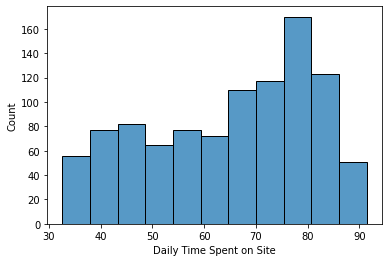

In [267]:
sns.histplot(data = df, x = df['Daily Time Spent on Site'])

<AxesSubplot: xlabel='Age', ylabel='Count'>

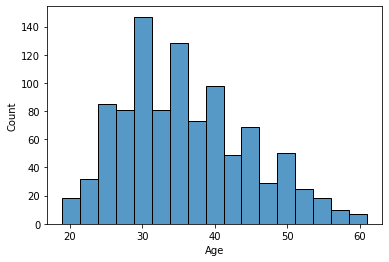

In [268]:
sns.histplot(data = df, x = df['Age'])

<AxesSubplot: xlabel='Age', ylabel='count'>

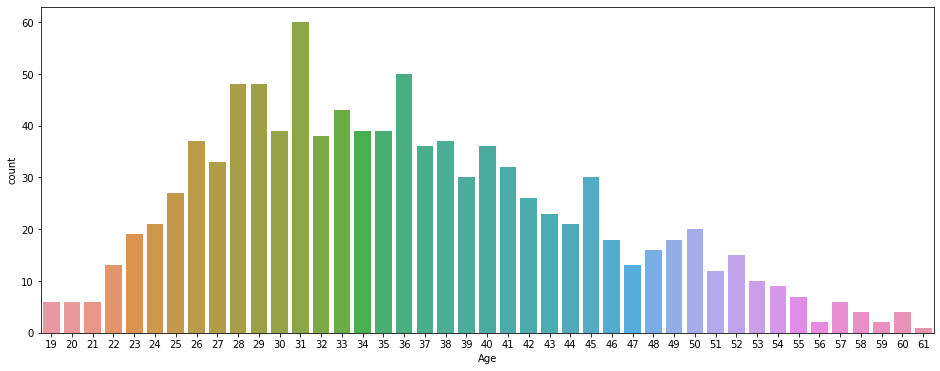

In [271]:
plt.figure(figsize = (16,6))
sns.countplot(x = df['Age'])

In [272]:
df['Age_groups'].value_counts()

young    444
adult    430
old      126
Name: Age_groups, dtype: int64

<AxesSubplot: xlabel='Age_groups', ylabel='count'>

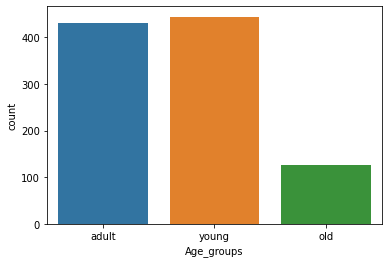

In [273]:
sns.countplot(x = df['Age_groups'])

<AxesSubplot: xlabel='Age_groups', ylabel='Daily Time Spent on Site'>

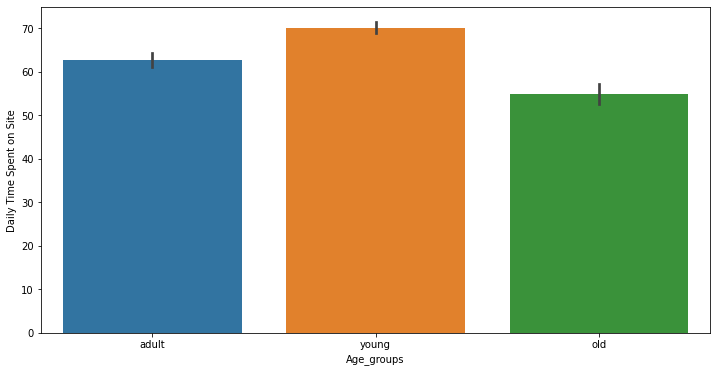

In [280]:
plt.figure(figsize = (12,6))
sns.barplot(data = df, x = df['Age_groups'] , y = df['Daily Time Spent on Site'])

<AxesSubplot: xlabel='Age_groups', ylabel='Daily Time Spent on Site'>

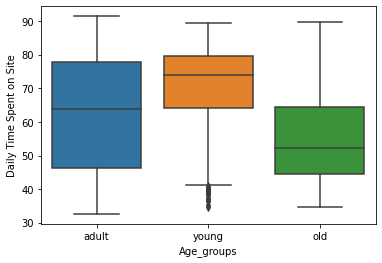

In [288]:
sns.boxplot(data = df, x = 'Age_groups', y = 'Daily Time Spent on Site')

<AxesSubplot: xlabel='Age_groups', ylabel='Daily Time Spent on Site'>

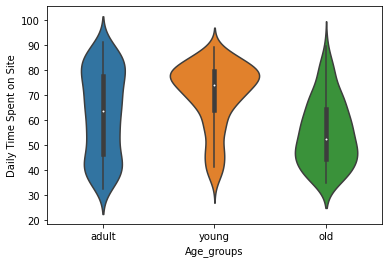

In [290]:
sns.violinplot(data = df, x = 'Age_groups', y = 'Daily Time Spent on Site')

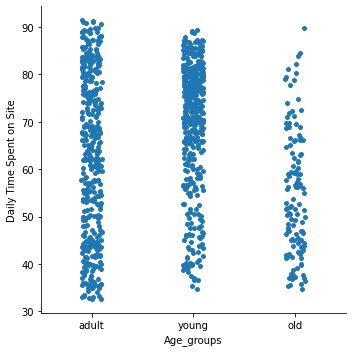

In [291]:
sns.catplot(data = df, x = 'Age_groups', y = 'Daily Time Spent on Site')

In [298]:
young_df = df[df['Age_groups'] == 'young']
adult_df = df[df['Age_groups'] == 'adult']
old_df = df[df['Age_groups'] == 'old']
dataframes = [young_df, adult_df, old_df]
samples = []
for i in dataframes:
    samples.append(i['Daily Time Spent on Site'])


In [300]:
from scipy.stats import f_oneway
f_score , p_value = f_oneway(*samples)

In [301]:
print('F_score: ', f_score)
print('P_value: ', p_value)
# f_score is high and p value is low this means that the variance in the data is due to the difference in means of the groups
# thus each group has certain range of values for Daily Time Spent on Site
# so each group affects the spent time 

F_score:  59.26824116449695
P_value:  4.77389772073441e-25
